<a href="https://colab.research.google.com/github/sbooeshaghi/colosseum/blob/master/analysis/archimedian_spiral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import matplotlib.patches as mpatches
import math
from matplotlib.ticker import MaxNLocator
import matplotlib.ticker as mtick


plt.rcParams.update({'font.size': 20})
%config InlineBackend.figure_format = 'retina'

In [13]:
def spiral_points(arc=1, separation=1):
    """generate points on an Archimedes' spiral
    with `arc` giving the length of arc between two points
    and `separation` giving the distance between consecutive 
    turnings
    - approximate arc length with circle arc at given distance
    - use a spiral equation r = b * phi
    """
    def p2c(r, phi):
        """polar to cartesian
        """
        return (r * math.cos(phi), r * math.sin(phi), phi)

    # yield a point at origin
    yield (0, 0, 0)

    # initialize the next point in the required distance
    r = arc
    b = separation / (2 * math.pi)
    # find the first phi to satisfy distance of `arc` to the second point
    phi = float(r) / b
    while True:
        yield p2c(r, phi)
        # advance the variables
        # calculate phi that will give desired arc length at current radius
        # (approximating with circle)
        phi += float(arc) / r
        r = b * phi

In [14]:
n_tubes = 88
l_arc = 13
separation = 19.5

## Generate spiral

In [15]:
data = np.zeros((n_tubes,2))
phi = np.zeros(n_tubes)
for idx, (x,y,p) in enumerate(spiral_points(arc=l_arc, separation=separation)):
    if idx==n_tubes:
        break
    data[idx] = [x,y]
    phi[idx] = p

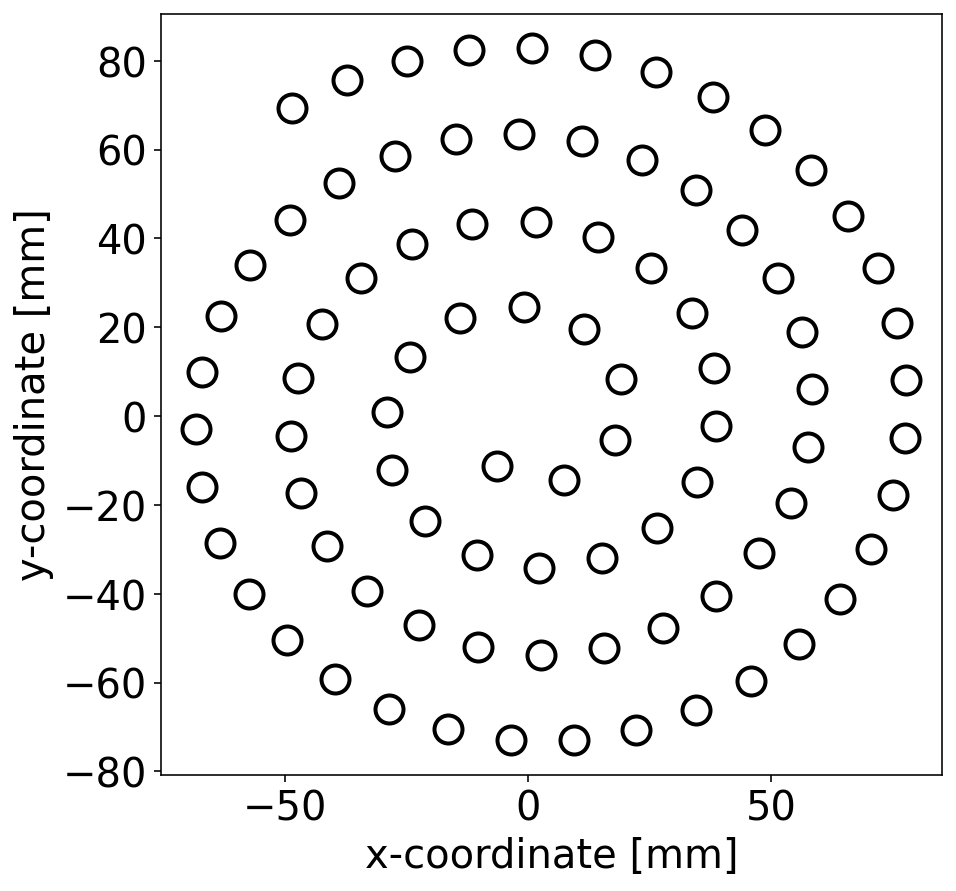

In [23]:
fig, ax = plt.subplots(figsize=(7, 7))

x = data[:,0][1:]
y = data[:,1][1:]

ax.plot(x, y, 'o', ms=14, markerfacecolor="None",markeredgecolor='black', markeredgewidth=2)

ax.set(**{
    "xlabel":"x-coordinate [mm]", 
    "ylabel":"y-coordinate [mm]"
    })

fig.savefig("spiral.png", dpi=300, bbox_inches ='tight')

fig.show()

In [17]:
rad = []
for n, (x, y) in enumerate(data):
    t = math.atan2(y,x)+ n*2*np.pi
    rad.append(t)

def rad2deg(rad):
  return np.array(rad)*180/np.pi

def deg2step(deg):
  return np.array(deg)*200/360 

theta_rad = np.array(rad)
theta_deg = rad2deg(rad)
theta_stp = deg2step(theta_deg)

In [18]:
diff = phi[1:]-phi[:-1]
diff_deg = rad2deg(diff)
diff_stp = deg2step(diff_deg)

total_deg = rad2deg(phi)
total_stp = deg2step(total_deg)

## $\Delta \Theta$ between tubes

In [19]:
measured =  np.array([84, 78, 75, 70, 64, 61, 58, 56, 54, 52, 50, 48, 47, 46, 45, 44, 43,
                      42, 41, 40, 39, 39, 38, 37, 36, 36, 35, 34, 34, 34, 33, 33, 32, 32,
                      31, 31, 31, 30, 30, 30, 29, 29, 29, 28, 28, 28, 27, 27, 27, 26, 26,
                      26, 26, 26, 25, 25, 25, 25, 24, 24, 24, 24, 24, 24, 23, 23, 23, 23,
                      23, 23, 22, 22, 22, 22, 22, 22, 22, 22, 21, 21, 21, 21, 21, 21, 21,
                      20, 20])
measured = measured/4 # since these are quarter steps

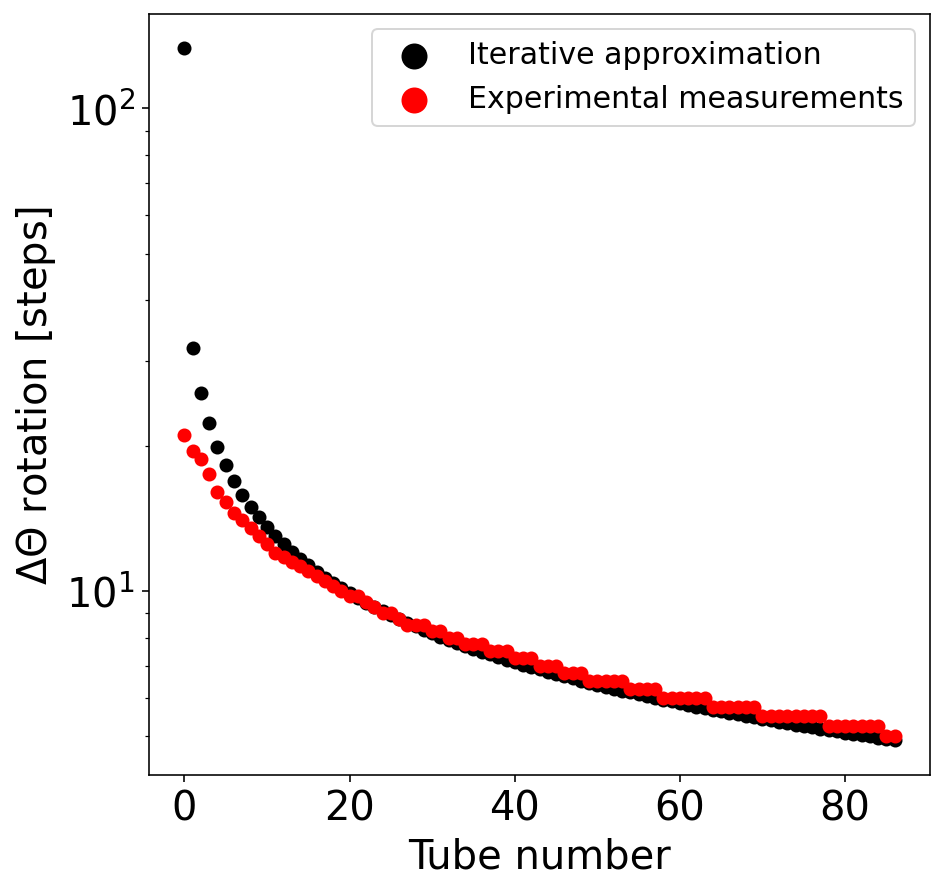

In [24]:
fig, ax = plt.subplots(figsize=(7,7))

x = np.arange(len(diff_stp))
y = diff_stp

ax.scatter(x, y, color="black", zorder=10, label='Iterative approximation')
ax.scatter(x, measured, color='r', zorder=10, label="Experimental measurements")

ax.set(**{
    "xlabel": "Tube number",
    "ylabel":"$\Delta \Theta$ rotation [steps]",
    'yscale': 'log'
    })

ax.legend(fontsize=15,markerscale=2)

fig.savefig("delta_theta.png", dpi=300, bbox_inches ='tight')

fig.show()

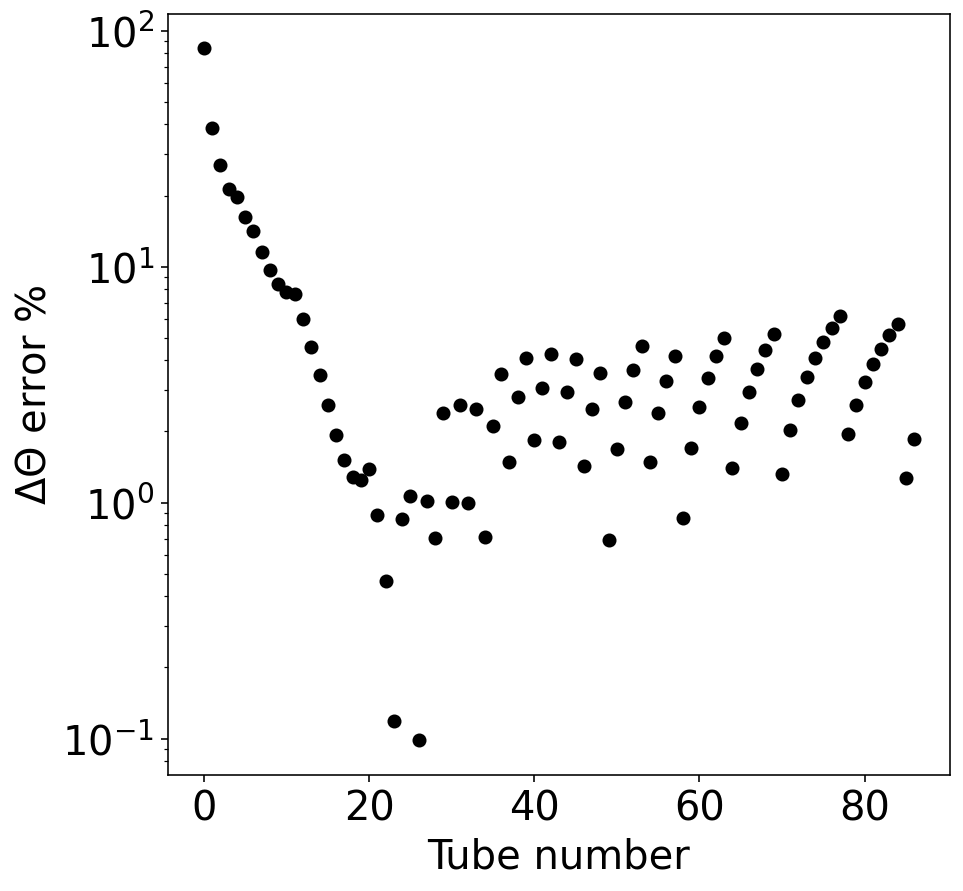

In [25]:
fig, ax = plt.subplots(figsize=(7,7))

x = np.arange(len(diff_stp))
error = np.abs(diff_stp-measured)/diff_stp*100

ax.scatter(x, error, color='black')

ax.set(**{
    "yscale": 'log',
    'ylabel': "$\Delta \Theta$ error %",
    'xlabel': 'Tube number'
    })

fig.savefig("delta_theta_error.png", dpi=300, bbox_inches ='tight')

fig.show()

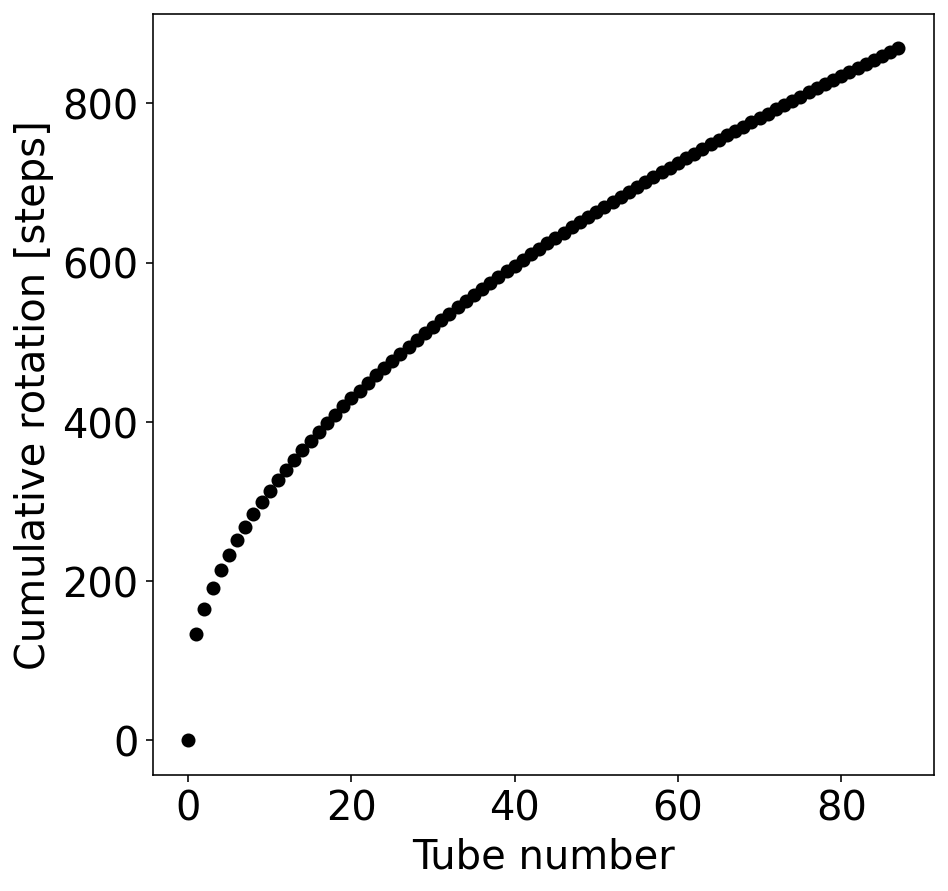

In [26]:
fig, ax = plt.subplots(figsize=(7,7))

x = np.arange(len(theta_stp))
y = total_stp

ax.scatter(x, y, color="black", zorder=-10)

ax.set(**{
    "xlabel": "Tube number",
    "ylabel":"Cumulative rotation [steps]",
    })

fig.savefig("cumulative_theta.png", dpi=300, bbox_inches ='tight')

fig.show()